In [75]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('Customer Churn.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
df.shape

(7043, 21)

In [78]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

    All the values in the CustomerID column are unique, so we can remove that column. 
    TotalCharges should be a continous type variable, but it's showing 'Object'. 
    There could be missing values/special characters in the column. 

In [79]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

    We can see that there are no null values in the dataset. 

In [80]:
for i in df.columns: 
    print('Total number of unique values in ', i, ' = ', df[i].nunique())

Total number of unique values in  customerID  =  7043
Total number of unique values in  gender  =  2
Total number of unique values in  SeniorCitizen  =  2
Total number of unique values in  Partner  =  2
Total number of unique values in  Dependents  =  2
Total number of unique values in  tenure  =  73
Total number of unique values in  PhoneService  =  2
Total number of unique values in  MultipleLines  =  3
Total number of unique values in  InternetService  =  3
Total number of unique values in  OnlineSecurity  =  3
Total number of unique values in  OnlineBackup  =  3
Total number of unique values in  DeviceProtection  =  3
Total number of unique values in  TechSupport  =  3
Total number of unique values in  StreamingTV  =  3
Total number of unique values in  StreamingMovies  =  3
Total number of unique values in  Contract  =  3
Total number of unique values in  PaperlessBilling  =  2
Total number of unique values in  PaymentMethod  =  4
Total number of unique values in  MonthlyCharges  

    We can see that all columns except Customer ID, Tenure, MonthlyCharges & TotalCharges are continuous. All the other columns are categorical. 

In [81]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [82]:
#Finding the unique values for categorical types
categ_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
              'PhoneService', 'MultipleLines', 'InternetService', 
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
              'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling', 'PaymentMethod', 
              'Churn']
for i in range(len(categ_cols)):
    print("----- {}-----".format(categ_cols[i]))
    print(df[categ_cols[i]].value_counts())
    print('\n')

----- gender-----
Male      3555
Female    3488
Name: gender, dtype: int64


----- SeniorCitizen-----
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


----- Partner-----
No     3641
Yes    3402
Name: Partner, dtype: int64


----- Dependents-----
No     4933
Yes    2110
Name: Dependents, dtype: int64


----- PhoneService-----
Yes    6361
No      682
Name: PhoneService, dtype: int64


----- MultipleLines-----
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


----- InternetService-----
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


----- OnlineSecurity-----
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


----- OnlineBackup-----
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


----- DeviceProtection-----
No                     3095


Observation: 
    
    Since we already established that there are no null values, we can see the distribution of each categories in the result above. 
    We only have encoding left to be done.

In [83]:
#Separating the numerical columns. 
numer_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [84]:
#Checking for special characters in TotalCharges
for i in df['TotalCharges']:
    a = isinstance(i,int)
    if a == False:
        b = isinstance(i,float)
        if b == True: 
            print(i)

    The above program should've returned a value if there are any characters/str/char in the list. But there are none. So we will have to check for spaces. 

In [85]:
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


    We can see that there are space values in the TotalCharges column. We'll change it to NaN. 

In [86]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [87]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

    Now we can see 11 NaN values in the TotalCharges Column. This can be filled with mean. 

In [88]:
#Imputing before changing the datatype causes an error 'can only concatenate str (not "int") to str'.
#So changing the object datatype to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [89]:
df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [90]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

    Now we can proceed to visualization

Male      3555
Female    3488
Name: gender, dtype: int64


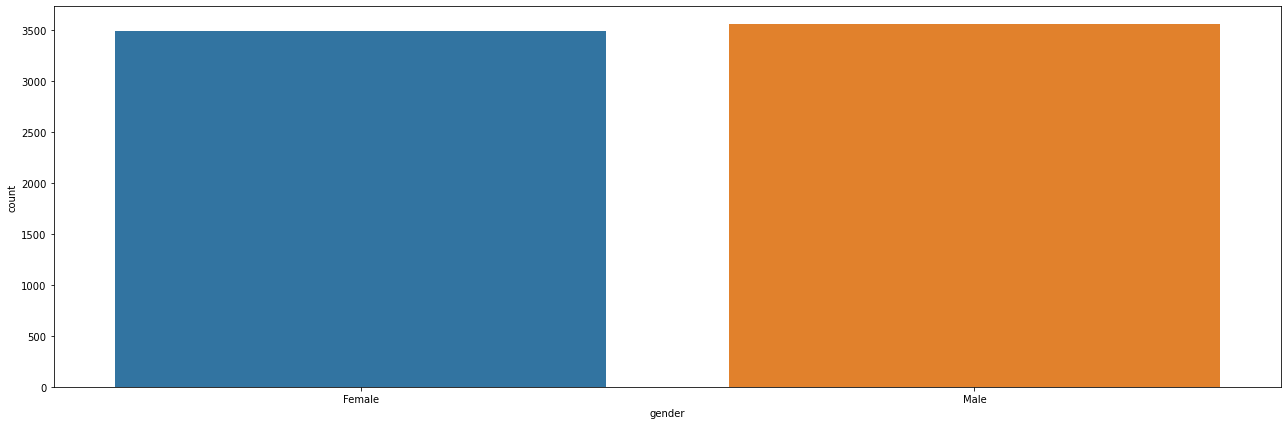

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


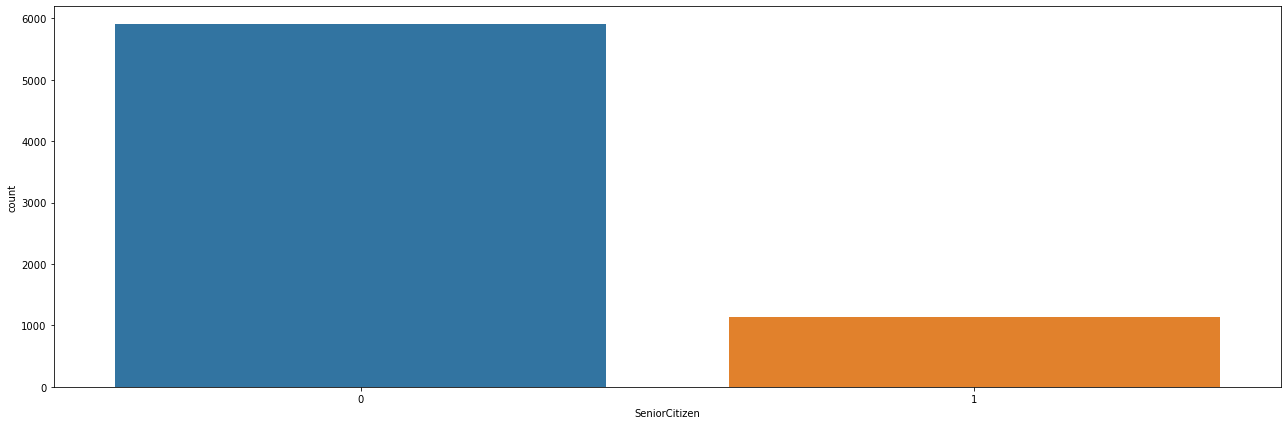

No     3641
Yes    3402
Name: Partner, dtype: int64


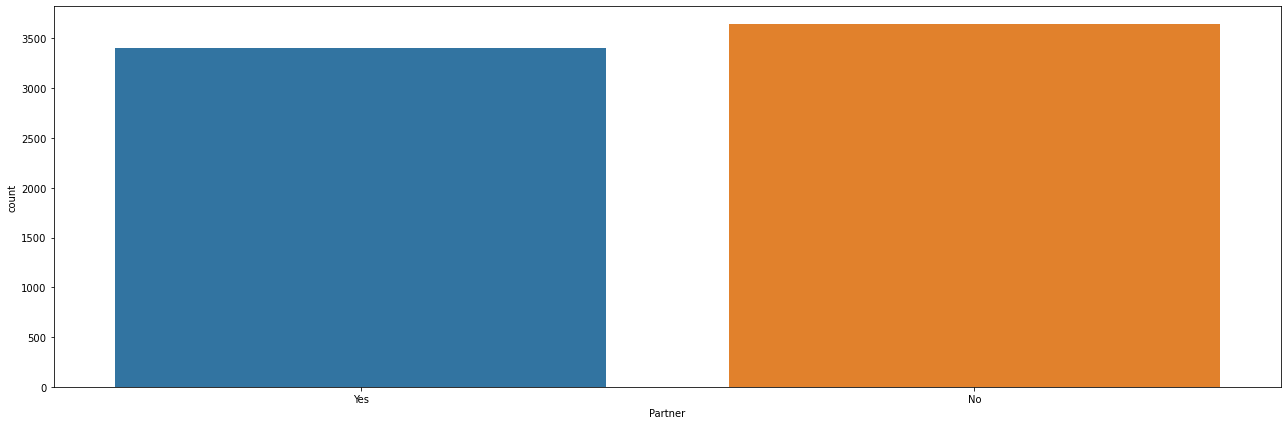

No     4933
Yes    2110
Name: Dependents, dtype: int64


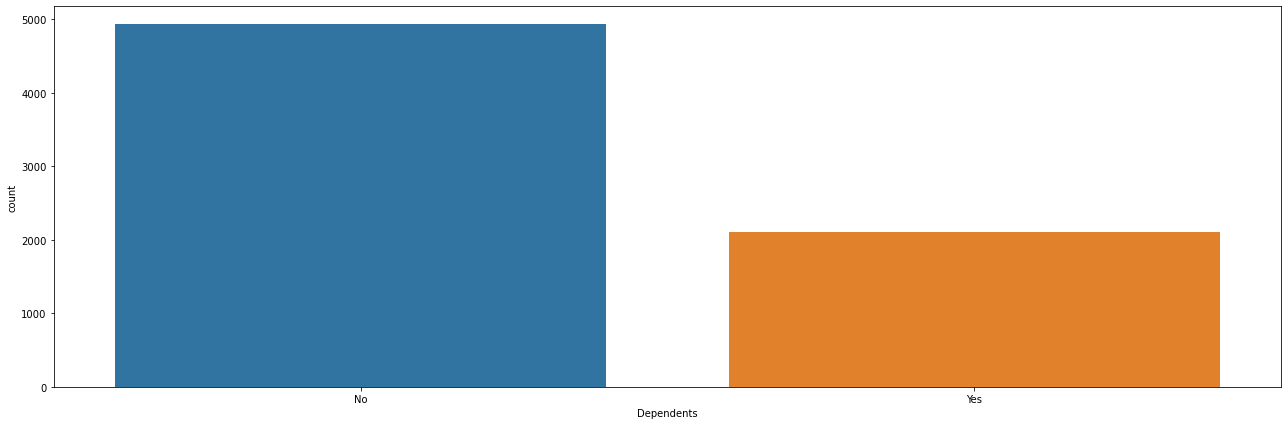

Yes    6361
No      682
Name: PhoneService, dtype: int64


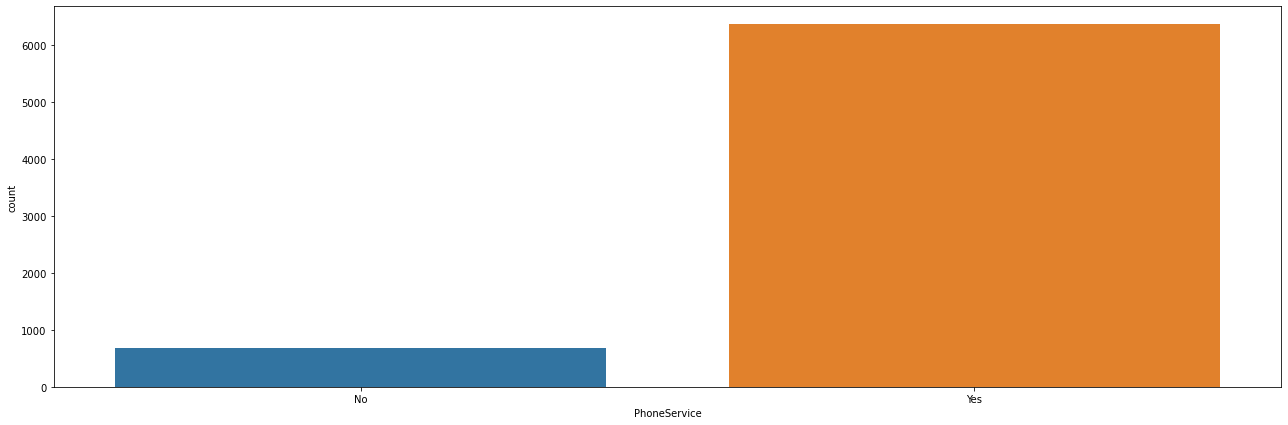

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


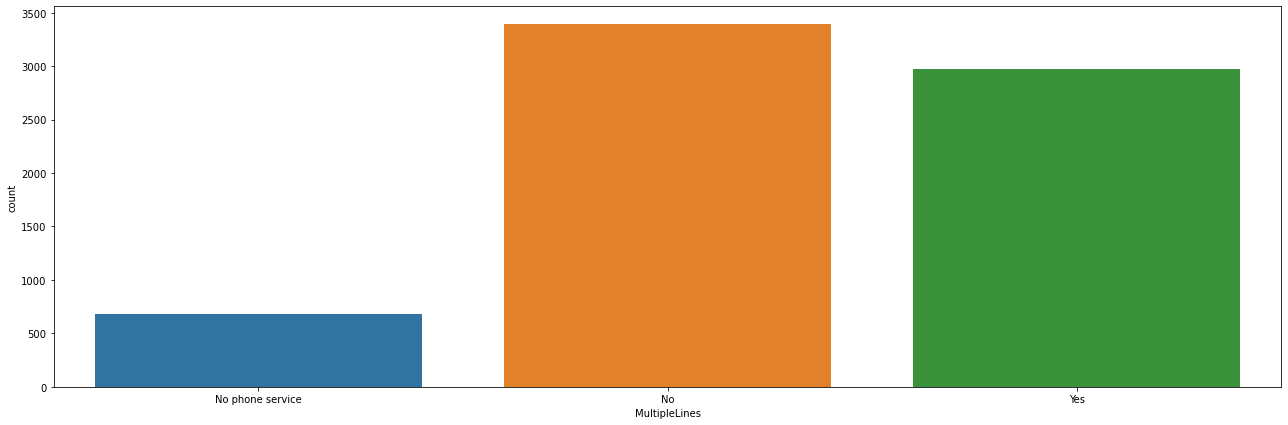

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


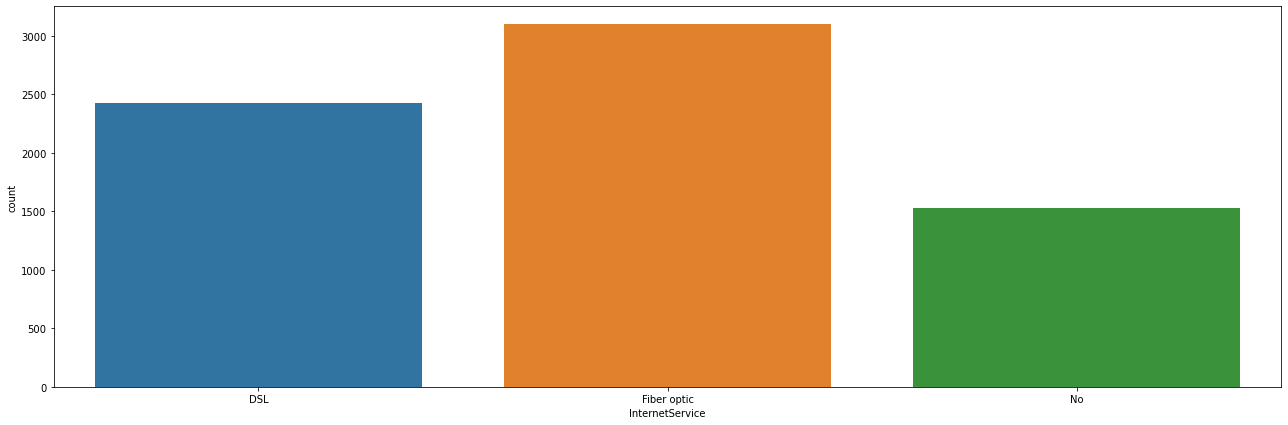

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


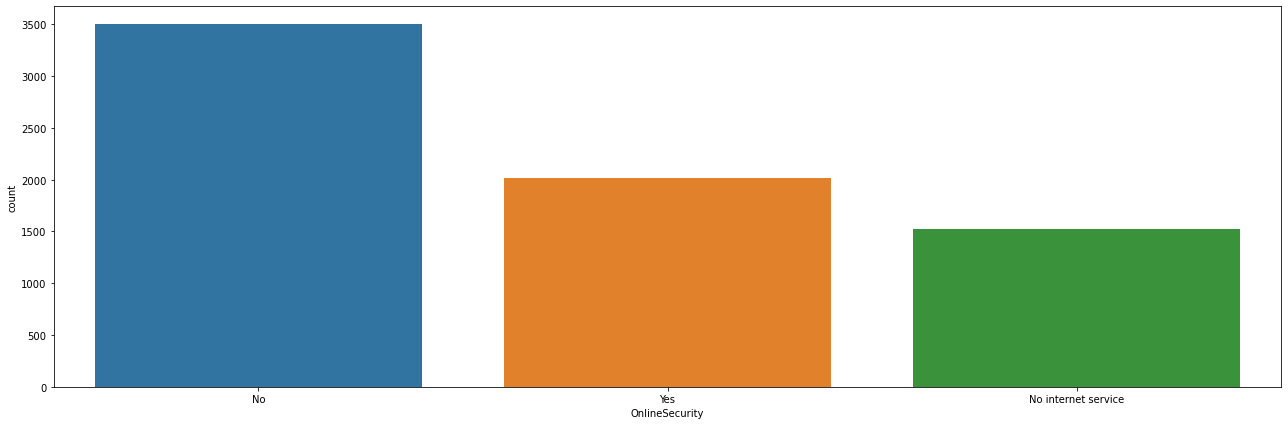

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


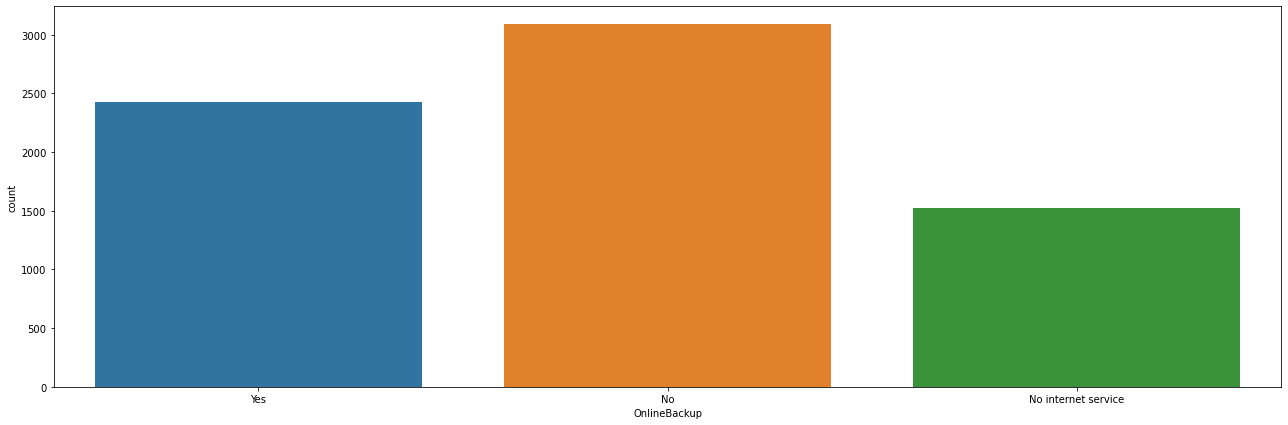

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


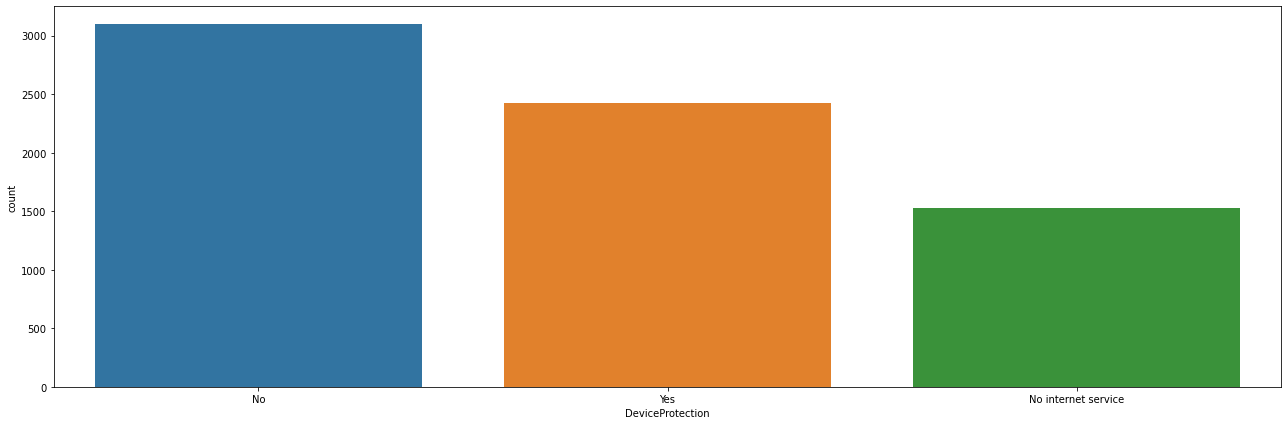

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


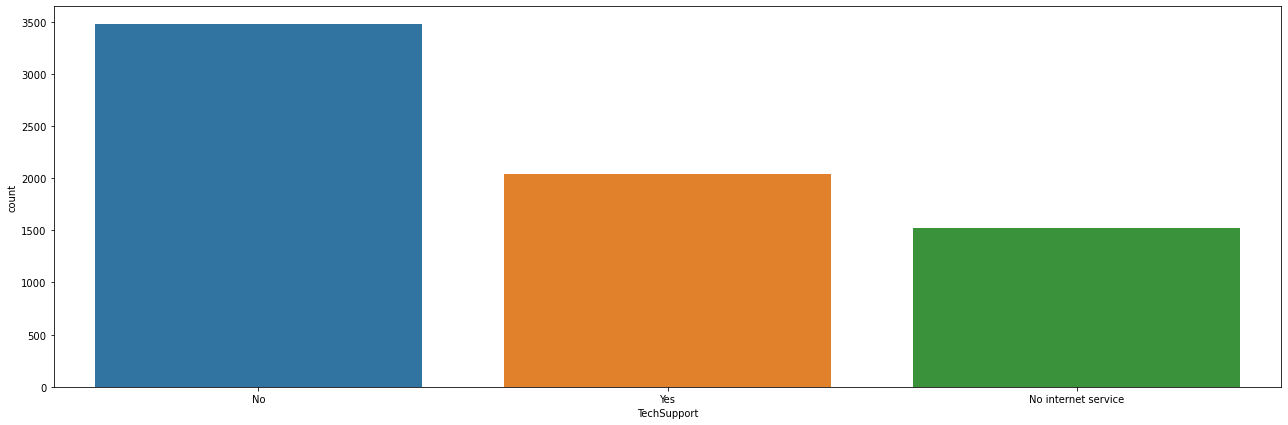

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


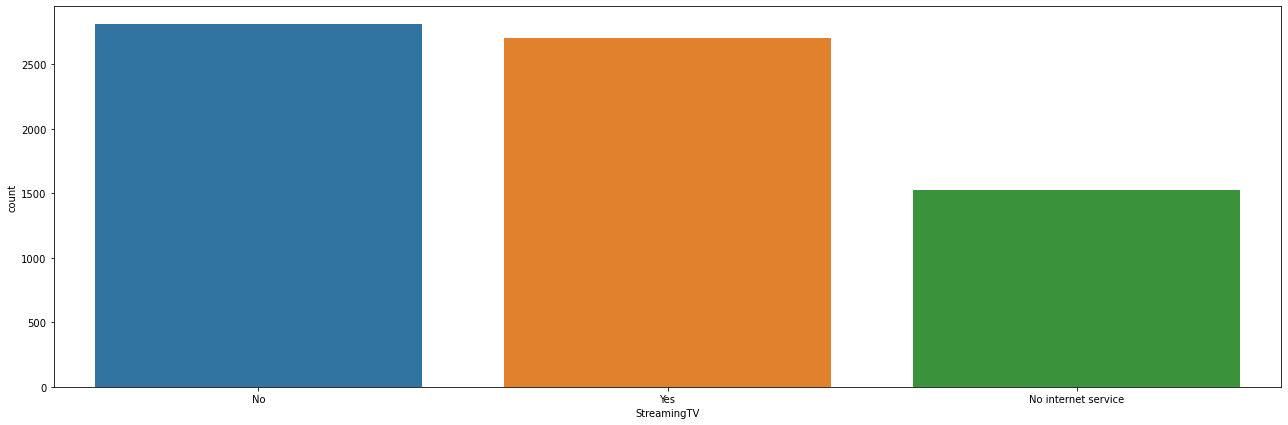

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


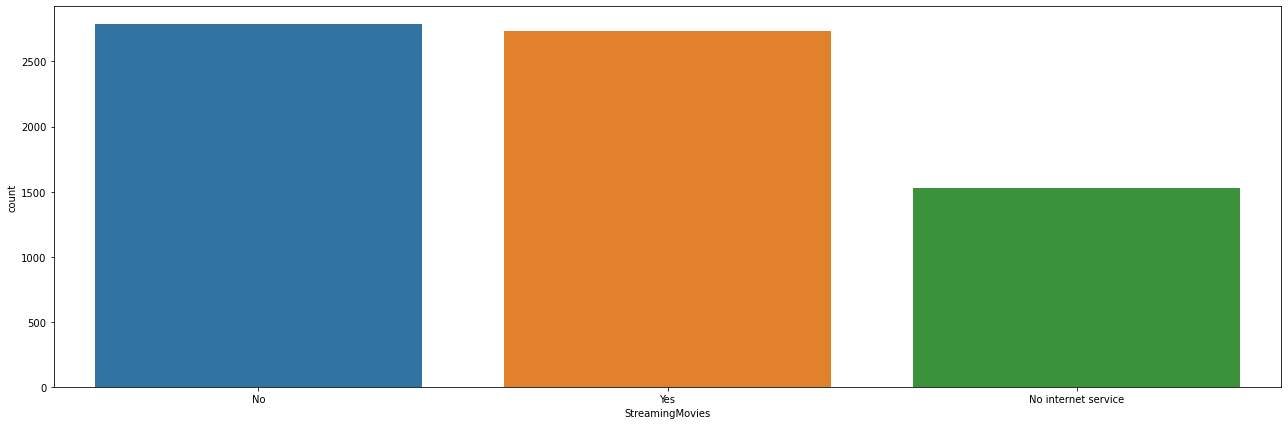

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


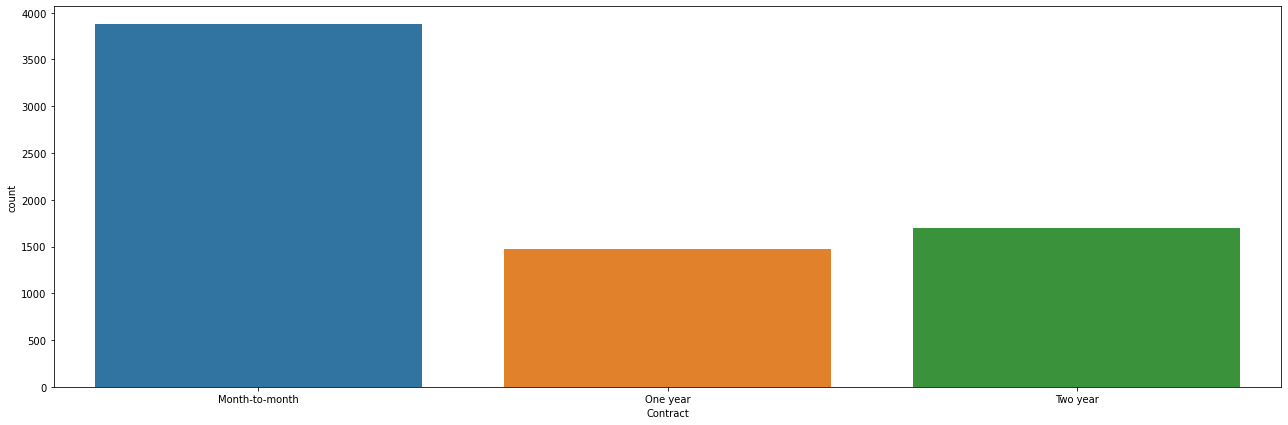

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


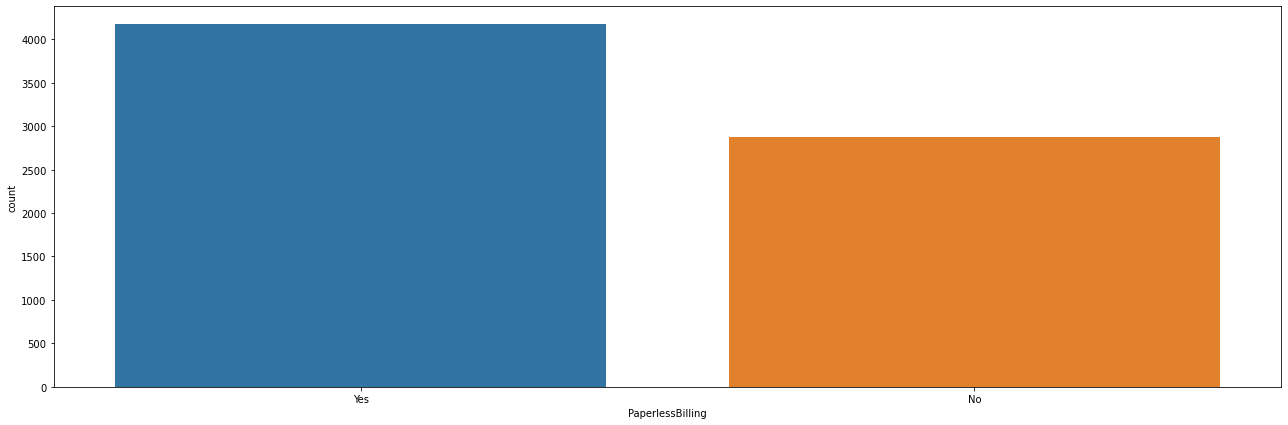

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


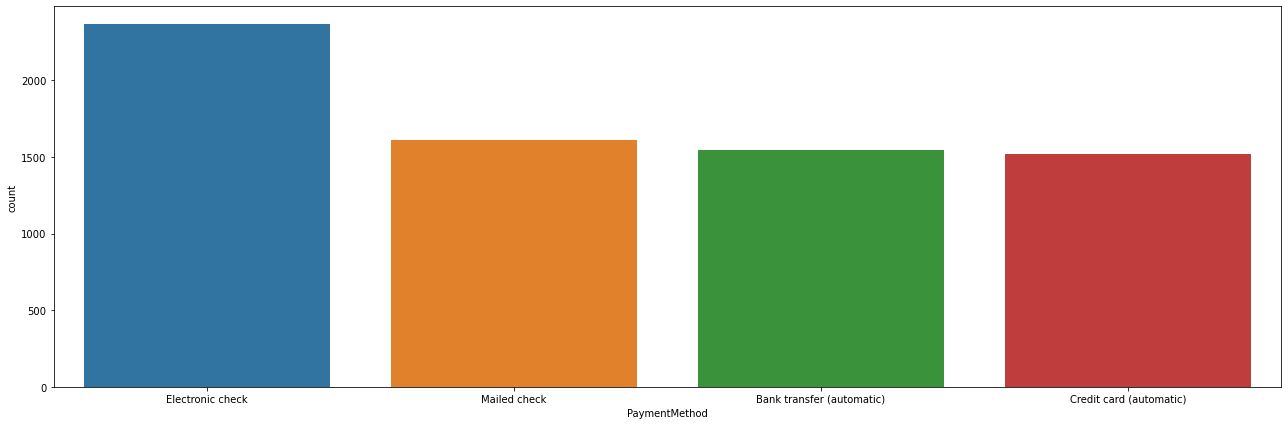

No     5174
Yes    1869
Name: Churn, dtype: int64


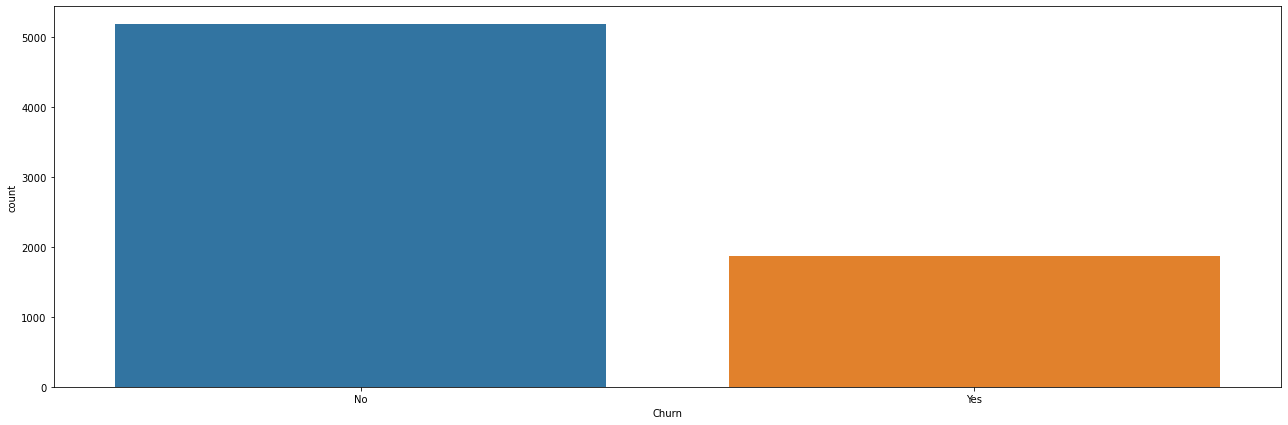

In [91]:
for i in categ_cols: 
    plt.figure(figsize = (22,7))
    ax = sb.countplot(x = i, data = df)
    print(df[i].value_counts())
    plt.show()

Observation: 
    
    We can see that the dataset is fairly balanced when it comes to the male female ratio.
    We can see that the number of senior citizens in the dataset is fairly low. There are only 1142 SeniorCitizens to 5901 younger people.
    The number of partners & non-partners are fairly equal. 
    The number of people with no dependents are higher when compared to people with dependents. 
    People who haven't opted for the PhoneService are really low. 
    Going with the point above, the people with single lines are higher and the number of people with multiple lines are a tad bit lower. 
    3096 people opted for Fiberoptics, 2421 opted for DSL while 1526 opted for no InternetService.
    2019 people opted for OnlineSecurity, 3498 didn't opt for it, and 1526 as always has no InternetService. 
    2429 people opted for OnlineBackup while 3088 people didn't. 
    2422 people opted for DeviceProtection while 3095 didn't. 
    2044 people used for TechSupport while 3473 didn't. 
    2707 people used StreamingTv while 2710 didn't. 
    2732 people uses StreamingMovies while 2785 doesn't. 
    
    3875 people are on month-to-month contract, 1695 on two year contract and 1473 on yearly renewals. 
    
    4171 opted for PaperlessBilling while 2872 didn't. 
    2365 opted for Electronic check, 1612 opted for Mailed check, 1544 opted for Bank transfer (automatic), 1522 opted for Credit card (automatic)
    
    5174 didn't Churn while 1869 turned to other operators. 

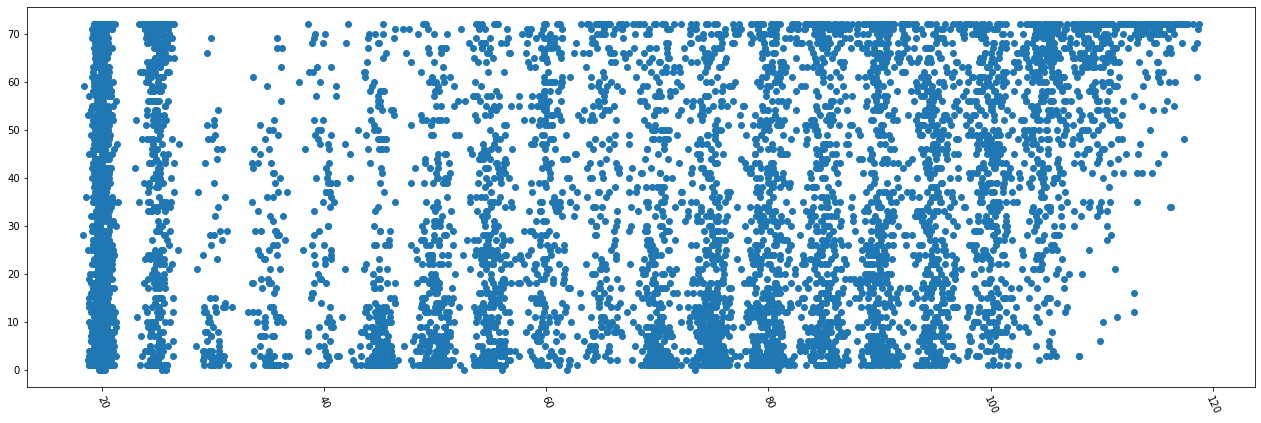

In [92]:
plt.figure(figsize = (22,7))
plt.scatter(x="MonthlyCharges", y="tenure", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that people tend to stay with the company for atleast 20 months before looking for other options.    

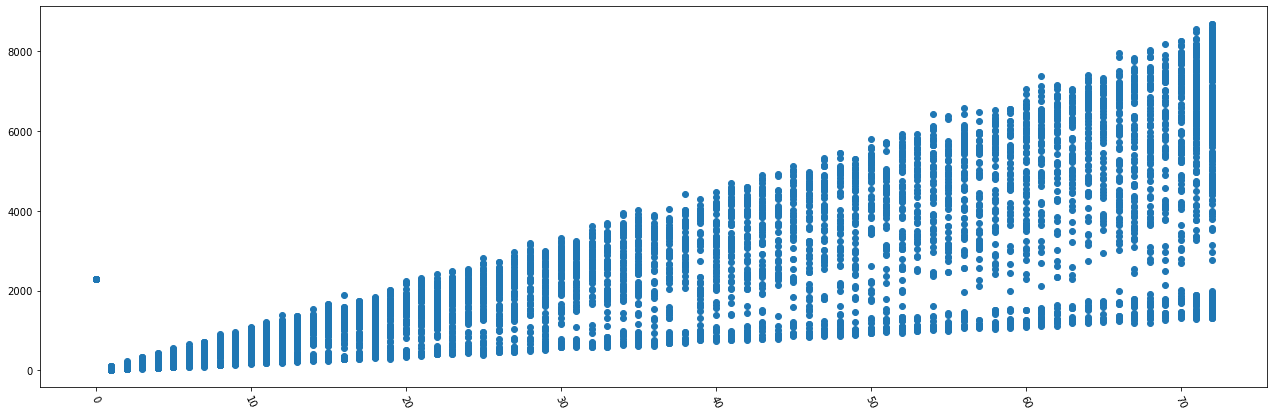

In [93]:
plt.figure(figsize = (22,7))
plt.scatter(x="tenure", y="TotalCharges", data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that there is a positive correlation with the tenute and total charges. Along with the tenurity, the total charges also increase. 

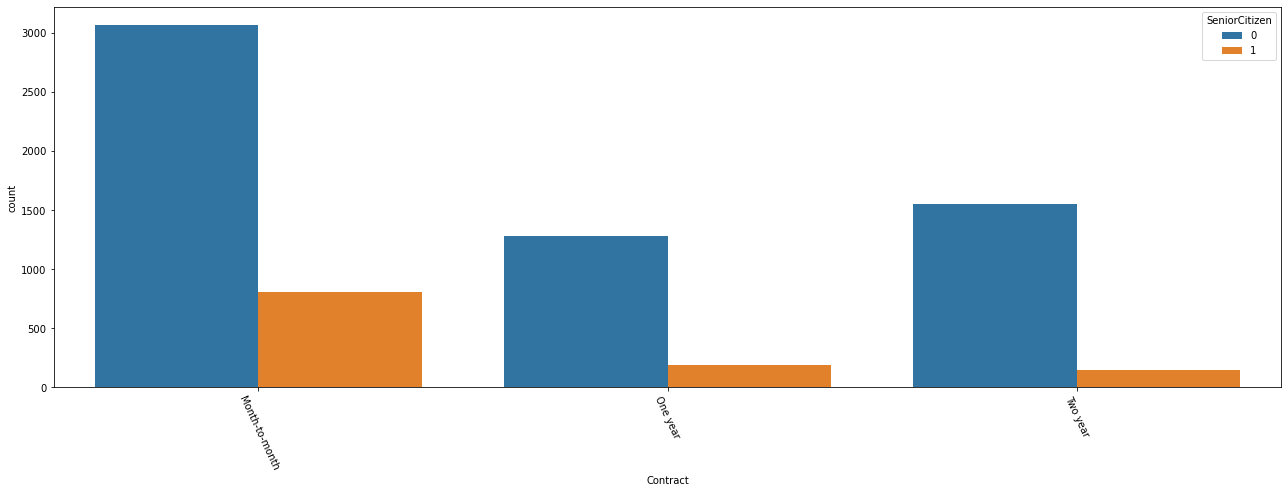

In [94]:
plt.figure(figsize = (22,7))
sb.countplot(x = 'Contract', hue ='SeniorCitizen', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can sese that the highest number of all people tend to use month-month connection while comparitively, higher number of non-seniorcitizen tend to use One & Two year connections. 

### Checking for outliers

    We can only check for outliers in the continuous data columns. 

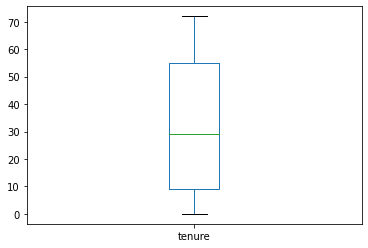

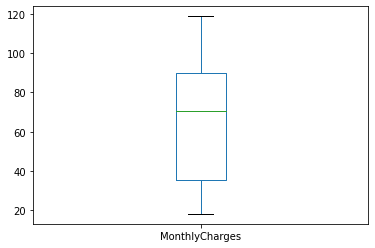

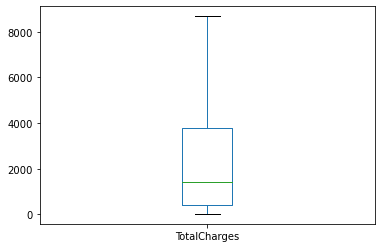

In [95]:
for i in numer_cols:
    df[i].plot.box()
    plt.show()

    Since there are no outliers, we can proceed with checking the skewness. 

### Checking Skewness

    Checking the skewness of continuous variables. 

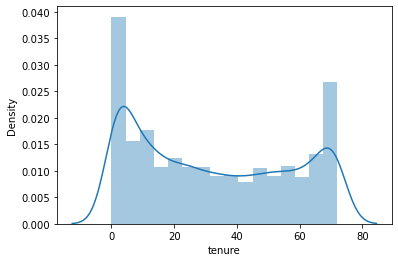

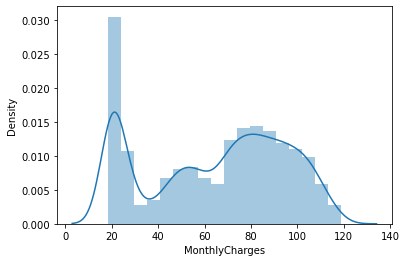

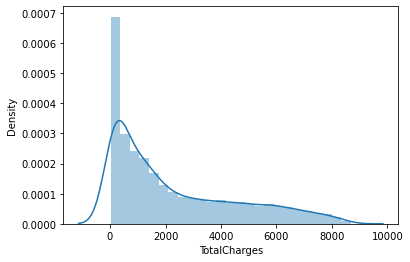

In [96]:
for i in numer_cols: 
    sb.distplot(df[i], kde = True)
    plt.show()

In [97]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

    We can see skewness in TotalCharges. We will remove this before modeling. 
    Since all the other columns except the ones in numer_cols are categorical, we can ignore those. 

### Encoding

In [98]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [99]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [100]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


    We can see variances in values ranging from ones to thousands. So we will have to scale this dataset

### Summary

In [101]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

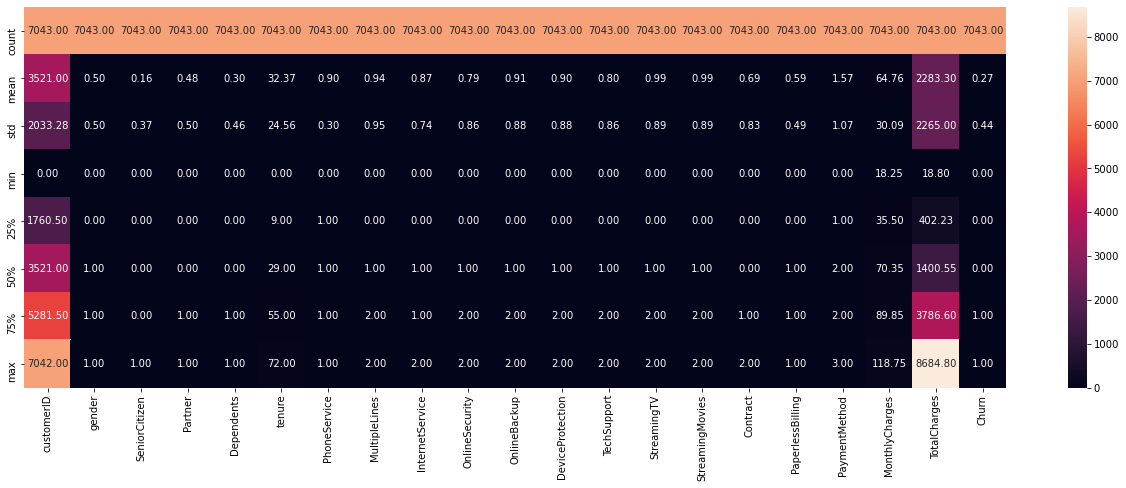

In [102]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

    We can see high difference in values for mean and max in the column Total Charges. Customer ID is unique for everyone,  so we can remove the whole column. 

### Removing unwanted columns. 

In [103]:
df.drop(['customerID'], axis = 1, inplace = True)

In [104]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


### Correlation

In [105]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

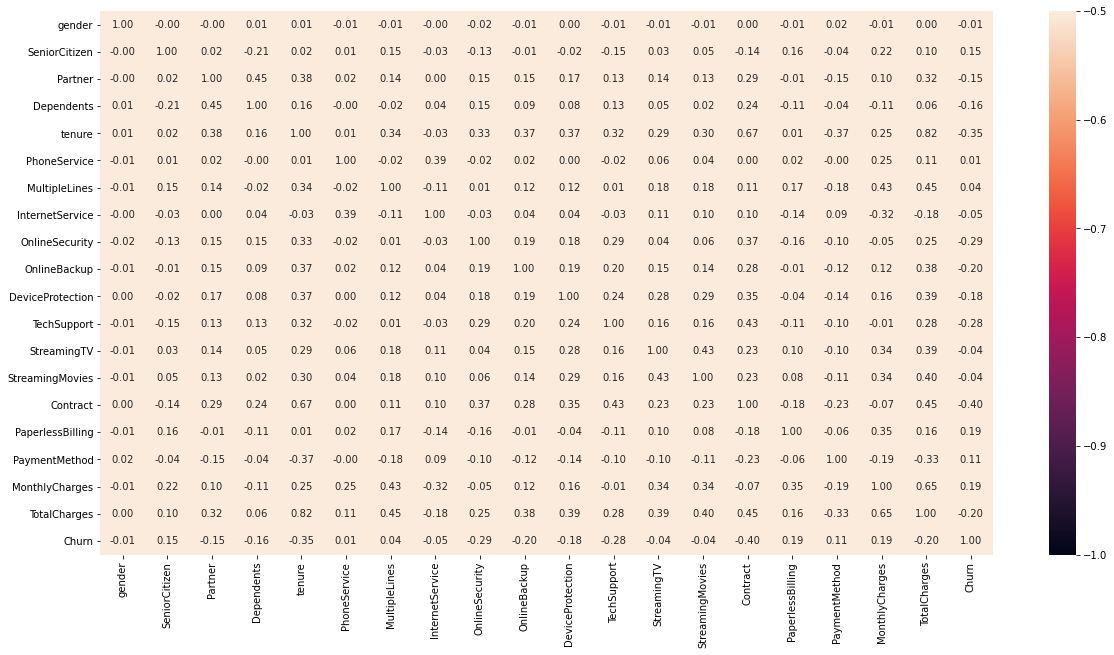

In [106]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -0.5, vmax = -1)

    We can see that there are no negative correlations between any columns. 

<AxesSubplot:>

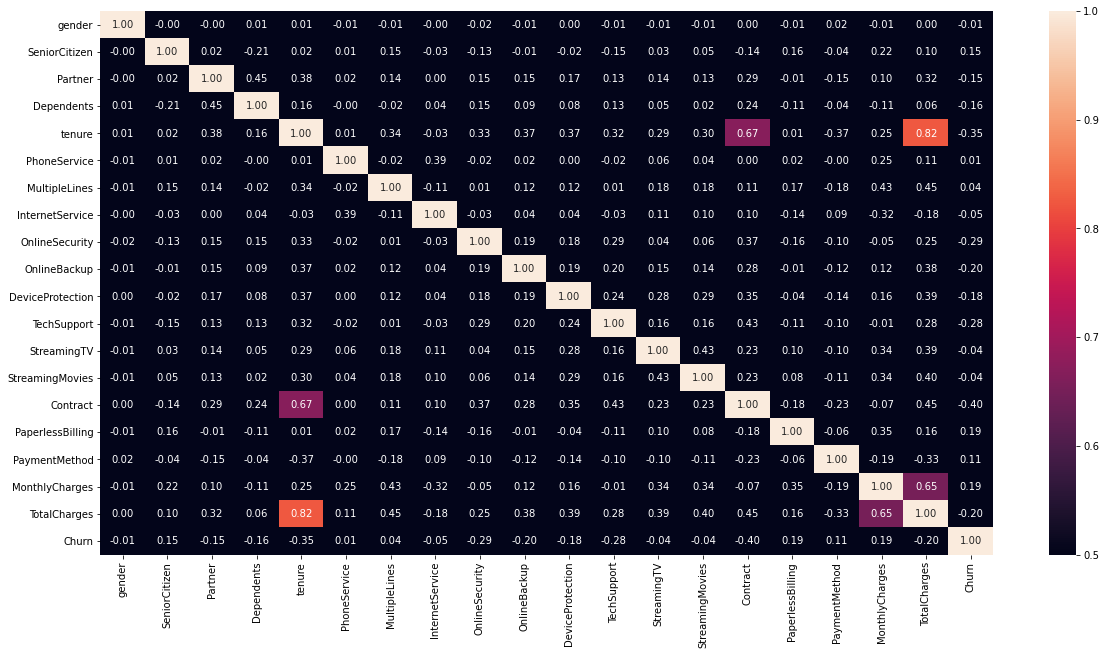

In [107]:
#Highlighting all the values greater than 0.5
#Plot to highlight high positive correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

    We can see that there is high correlation between Tenurity and TotalCharges. 
    There is a high correlation between Contract and tenurity. 
    High correlation between MonthlyCharges and TotalCharges. 

### Checking for outliers. 

In [108]:
from scipy.stats import zscore

In [109]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [110]:
df['PhoneService'].value_counts()

1.0    6361
0.0     682
Name: PhoneService, dtype: int64

    We can see that the column PhoneService is categorical, and this cannot be seen as a outlier. Hence we can proceed without removing the outlier. 

### Splitting X & Y

In [111]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [112]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [113]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

### Scaling

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
ss = StandardScaler()

In [116]:
x = ss.fit_transform(x)

In [117]:
ss_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [118]:
x = pd.DataFrame(x, columns = ss_cols)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193


### Importing the models 

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [120]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 50)

In [122]:
x_train.shape

(4930, 19)

In [123]:
y_train.shape

(4930,)

In [124]:
x_test.shape

(2113, 19)

In [125]:
y_test.shape

(2113,)

In [126]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model: 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Accuracy Score  :  LogisticRegression()
0.795551348793185
[[1365  191]
 [ 241  316]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1556
         1.0       0.62      0.57      0.59       557

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy Score  :  GaussianNB()
0.7557974443918599
[[1165  391]
 [ 125  432]]
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1556
         1.0       0.52      0.78      0.63       557

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Accuracy Score  :  SVC()
0.7950780880265026
[[1409  147]
 [ 286  271]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1556
   

### Cross Validation

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model:
    print(m)
    i = []
    for a in range (2,10):
        score = cross_val_score(m, x, y, cv = a)
        k = score.mean()
        i.append(k)
    print(i)
    print('CV Value = ', i.index(max(i))+2)
    print('Best Score =' , max(i))
    print('\n')

LogisticRegression()
[0.8013625878379436, 0.8027831994980966, 0.804061564322957, 0.8023577125943608, 0.8023582615279526, 0.8042031538954667, 0.8033507248993912, 0.802216175862686]
CV Value =  7
Best Score = 0.8042031538954667


GaussianNB()
[0.7528040163335716, 0.7522372006067165, 0.7533727124309535, 0.7533735039357377, 0.7537990407875862, 0.752520061923818, 0.7523768831905892, 0.7523770794341391]
CV Value =  6
Best Score = 0.7537990407875862


SVC()
[0.7934115111392164, 0.7973880534721552, 0.7963949815445769, 0.8003696811084586, 0.7985243649344783, 0.7986650955382756, 0.7979567059642967, 0.7966795469367712]
CV Value =  5
Best Score = 0.8003696811084586


RandomForestClassifier()
[0.7857444043454048, 0.7927030943364818, 0.7865977976098291, 0.7904313383121492, 0.7905730052433783, 0.7925602858942247, 0.7929864049117737, 0.7917110798268259]
CV Value =  8
Best Score = 0.7929864049117737


DecisionTreeClassifier()
[0.7256853944073048, 0.7268218734416839, 0.7325025973104125, 0.72880820940060

    We can see that the smallest difference between accuracy score and CV score is for RandomForestClassifier. 

### Re-running the best model

In [129]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print('Accuracy score: ')
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Accuracy score: 
0.7889256980596309
[[1386  170]
 [ 276  281]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1556
         1.0       0.62      0.50      0.56       557

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



### AUC_ROC Curve

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [131]:
y_pred_prob = lr.predict_proba(x_test)[:, 1]

In [132]:
y_pred_prob

array([0.27765344, 0.0182006 , 0.00214578, ..., 0.17097627, 0.1693411 ,
       0.56831222])

In [133]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [134]:
fpr

array([0.00000000e+00, 6.42673522e-04, 6.42673522e-04, 1.28534704e-03,
       1.28534704e-03, 1.92802057e-03, 1.92802057e-03, 2.57069409e-03,
       2.57069409e-03, 3.21336761e-03, 3.21336761e-03, 4.49871465e-03,
       4.49871465e-03, 5.78406170e-03, 5.78406170e-03, 6.42673522e-03,
       6.42673522e-03, 7.06940874e-03, 7.06940874e-03, 7.71208226e-03,
       7.71208226e-03, 8.35475578e-03, 8.35475578e-03, 8.99742931e-03,
       8.99742931e-03, 1.02827763e-02, 1.02827763e-02, 1.15681234e-02,
       1.15681234e-02, 1.22107969e-02, 1.22107969e-02, 1.28534704e-02,
       1.28534704e-02, 1.34961440e-02, 1.34961440e-02, 1.41388175e-02,
       1.41388175e-02, 1.47814910e-02, 1.47814910e-02, 1.54241645e-02,
       1.54241645e-02, 1.73521851e-02, 1.73521851e-02, 1.99228792e-02,
       1.99228792e-02, 2.05655527e-02, 2.05655527e-02, 2.12082262e-02,
       2.12082262e-02, 2.18508997e-02, 2.18508997e-02, 2.37789203e-02,
       2.37789203e-02, 2.57069409e-02, 2.57069409e-02, 2.63496144e-02,
      

In [135]:
tpr

array([0.        , 0.        , 0.03052065, 0.03052065, 0.03411131,
       0.03411131, 0.04667864, 0.04667864, 0.0556553 , 0.0556553 ,
       0.06104129, 0.06104129, 0.07540395, 0.07540395, 0.09694794,
       0.09694794, 0.1005386 , 0.1005386 , 0.1059246 , 0.1059246 ,
       0.10771993, 0.10771993, 0.11131059, 0.11131059, 0.12567325,
       0.12567325, 0.13824057, 0.13824057, 0.14003591, 0.14003591,
       0.15439856, 0.15439856, 0.15798923, 0.15798923, 0.15978456,
       0.15978456, 0.16696589, 0.16696589, 0.16876122, 0.16876122,
       0.17055655, 0.17055655, 0.17773788, 0.17773788, 0.18671454,
       0.18671454, 0.18850987, 0.18850987, 0.19030521, 0.19030521,
       0.19210054, 0.19210054, 0.1956912 , 0.1956912 , 0.19748654,
       0.19748654, 0.19928187, 0.20287253, 0.2064632 , 0.2064632 ,
       0.21364452, 0.21364452, 0.21543986, 0.21543986, 0.22441652,
       0.22441652, 0.22980251, 0.22980251, 0.23698384, 0.23698384,
       0.24057451, 0.24057451, 0.24416517, 0.24416517, 0.24775

In [136]:
thresholds

array([1.85026606e+00, 8.50266062e-01, 8.00437011e-01, 7.99934689e-01,
       7.96718789e-01, 7.93195445e-01, 7.71953577e-01, 7.71615435e-01,
       7.66943466e-01, 7.62302296e-01, 7.61009412e-01, 7.60450304e-01,
       7.54451539e-01, 7.52693856e-01, 7.45006373e-01, 7.44479333e-01,
       7.43958846e-01, 7.43901323e-01, 7.40914246e-01, 7.40341807e-01,
       7.38292386e-01, 7.37247979e-01, 7.36816117e-01, 7.36683131e-01,
       7.32078011e-01, 7.30707796e-01, 7.29130349e-01, 7.28506281e-01,
       7.28092265e-01, 7.28001455e-01, 7.23952883e-01, 7.23746971e-01,
       7.22993081e-01, 7.22763902e-01, 7.21873271e-01, 7.21786041e-01,
       7.21022433e-01, 7.20727803e-01, 7.19983514e-01, 7.19314842e-01,
       7.18110551e-01, 7.15978010e-01, 7.15194911e-01, 7.11784636e-01,
       7.10681376e-01, 7.10653785e-01, 7.09732489e-01, 7.08889832e-01,
       7.08549559e-01, 7.08212953e-01, 7.07780046e-01, 7.07006635e-01,
       7.05521736e-01, 7.02966595e-01, 7.02687184e-01, 7.02638681e-01,
      

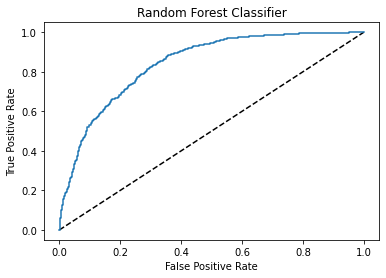

In [137]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [138]:
auc_score = roc_auc_score(y_test, lr.predict(x_test))

In [139]:
print(auc_score)

0.7222871562215873


### GridSearch CV

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
parameters = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [10, 50, 100]}
rfc = RandomForestClassifier()
rfccv = GridSearchCV(rfc, parameters)
rfccv.fit(x_train, y_train)

print(rfccv.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [142]:
rfc_final = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 50)
rfc_final.fit(x_train, y_train)
pred_rfc = rfc_final.predict(x_test)
print('Accuracy Score  : ', rfc_final)
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Accuracy Score  :  RandomForestClassifier(criterion='entropy', n_estimators=50)
0.7889256980596309
[[1379  177]
 [ 269  288]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1556
         1.0       0.62      0.52      0.56       557

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



    We're getting 78% accuracy for the model

In [143]:
data = [pred_rfc, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Creating OBJ file

In [144]:
import joblib

In [145]:
joblib.dump(pred_rfc, 'Customer_churn.obj')

['Customer_churn.obj']